In [2]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
path = 'flash/data'

In [6]:
filename = path + 'tab.h5'
#h5= tb.open_file(filename, 'w')
rows = 2000000

row_des = {'Date': tb.StringCol(26,pos =1), 'No1': tb.IntCol(pos=2),
            'No2': tb.IntCol(pos=3), 'No3': tb.Float64Col(pos=4),
            'No4': tb.Float64Col(pos=5)}

filters = tb.Filters(complevel=0)
tab = h5.create_table(where='/', name='ints_floats', description= row_des, title = 'Integers and Floats',
                        expectedrows = rows, filters = filters)

tab


/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [7]:
pointer = tab.row

In [9]:
ran_int = np.random.randint(0,10000, size = (rows,2))
ran_flo = np.random.standard_normal((rows,2)).round(5)

In [15]:
%%time
for i in range(rows):
    pointer['Date'] = str(dt.datetime.now())
    pointer['No1'] = ran_int[i,0]
    pointer['No2'] = ran_int[i,1]
    pointer['No3'] = ran_flo[i,0]
    pointer['No4'] = ran_flo[i,1]
    pointer.append()
tab.flush()


CPU times: user 4.95 s, sys: 97 ms, total: 5.04 s
Wall time: 5.32 s


In [16]:
ll $path*

-rw-r--r--@ 1 The_real_G  staff  100156248 Jun 15 17:08 flash/datatab.h5


In [17]:
tab[:3]

array([(b'2025-06-15 17:08:02.679804', 3601,  254,  0.1453 ,  1.98032),
       (b'2025-06-15 17:08:02.679943', 4823, 3051,  0.79822,  2.85095),
       (b'2025-06-15 17:08:02.679948', 2352, 7907, -0.4667 , -0.74614)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

2000000


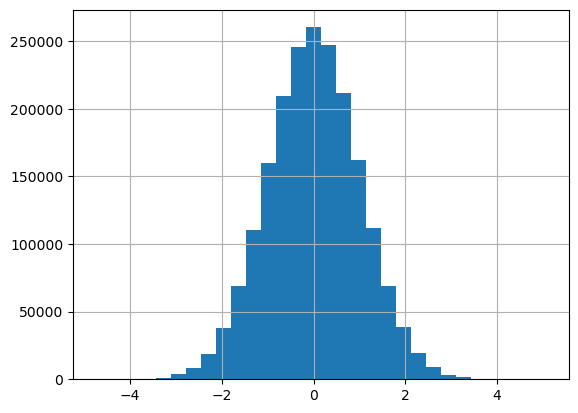

In [19]:
plt.hist(tab[:]['No3'], bins = 30)
plt.grid(True)
print(len(tab[:]['No3']))


In [21]:
%%time
values = tab.cols.No3[:]
print('Max %18.3f'% values.max())
print('min %18.3f'% values.min())
print('ave %18.3f'% values.mean())
print('std %18.3f'% values.std())

Max              5.072
min             -4.753
ave             -0.000
std              1.000
CPU times: user 29.6 ms, sys: 49.5 ms, total: 79.1 ms
Wall time: 101 ms


In [22]:
!rm -f {path}datatab.h5